In [9]:
from data import get_loader, test_dataset
from options import opt
import torch.backends.cudnn as cudnn
import logging
from tensorboardX import SummaryWriter
from utils import clip_gradient, adjust_lr
from models.BBSNet_model import BBSNetChannelSpatialAttention, BBSNetTransformerAttention
from torchvision.utils import make_grid
from datetime import datetime
import numpy as np
import os
import torch
import torch.nn.functional as F
import sys
sys.path.append('./models')

from BBSNet_train import *
from BBSNet_test import *
from utils import evaluate, draw_curve

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Train

In [ ]:
# setup_gpu()
# model, optimizer, CE = get_model()
# train_loader, test_loader, total_step = get_data()
# main(optimizer, model, train_loader, test_loader, CE, total_step)

# Use Trained Model

I save the model using this code:
torch.save(model.state_dict(), save_path +
                           'BBSNet_epoch_best.pth')

Now, after a long training period, I want to use it on my test data. So, how can I load this model?

In [ ]:
test(method='BBSNetChannelSpatialAttention')

In [11]:
evaluate()

Eval [NJU2K ] Dataset [Fmeasure] with [BBSNetChannelSpatialAttention] Method.


  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:13<00:00, 35.99it/s]




Eval [NJU2K ] Dataset [MAE] with [BBSNetChannelSpatialAttention] Method.


100%|██████████| 500/500 [00:01<00:00, 353.98it/s]




Eval [NJU2K ] Dataset [Smeasure] with [BBSNetChannelSpatialAttention] Method.


100%|██████████| 500/500 [00:02<00:00, 179.87it/s]




Eval [NJU2K ] Dataset [Emeasure] with [BBSNetChannelSpatialAttention] Method.


100%|██████████| 500/500 [00:45<00:00, 10.88it/s]




Eval [NJU2K ] Dataset [Fbw_measure] with [BBSNetChannelSpatialAttention] Method.


100%|██████████| 500/500 [00:12<00:00, 40.05it/s]



[cost:76.5371s][NJU2K  Dataset] [BBSNetChannelSpatialAttention Method] 0.0347 mae, 0.9208 max-fmeasure, 0.9041 mean-fmeasure, 0.9008 adp-fmeasure, 0.9517 max-Emeasure, 0.9411 mean-Emeasure, 0.9240 adp-Emeasure, 0.9213 S-measure_alpha05, 0.8801 Fbw-measure



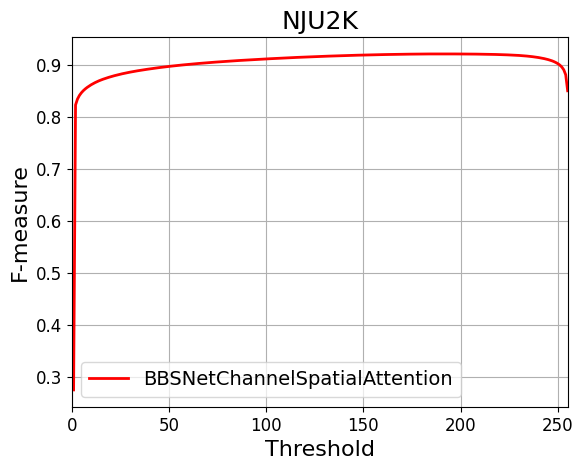

In [12]:
draw_curve()